In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
final=pd.read_csv(r'C:\Users\femif\Downloads\final_data.csv\final_data.csv')
final

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [3]:
final.shape

(10754, 22)

In [4]:
final.size

236588

In [5]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [6]:
#Identify the player with the highest combined total of goals and assists.

final['goals+assists'] = final['goals'] + final['assists']
final.groupby('player')['goals+assists'].sum().sort_values(ascending=False)[:1]

player
/rakan-al-dosari/profil/spieler/998314    11.25
Name: goals+assists, dtype: float64

In [7]:
# Find the team with the highest ratio of red cards to minutes played.

final_temp = final[['team', 'red cards', 'minutes played']].copy()

final_temp['redcards/minutes'] = final_temp.apply(lambda row: (row['red cards'] / row['minutes played']) if row['minutes played'] else 0, axis=1)
final_temp.sort_values(by='redcards/minutes', ascending=False)[:1]

,team,red cards,minutes played,redcards/minutes
3527,Goiás Esporte Clube,6.923077,13,0.532544


<Axes: xlabel='age', ylabel='award'>

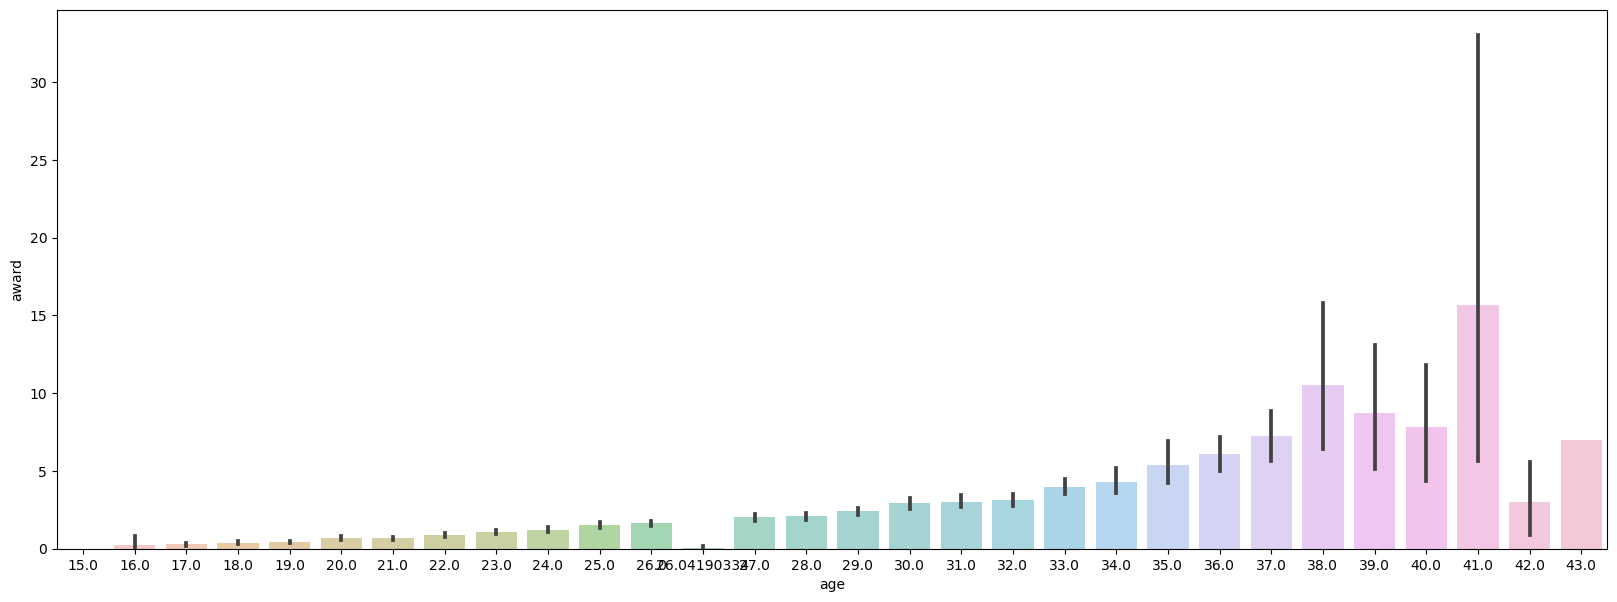

In [8]:
# Explore the relationship between age and the number of awards won by players.

import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
sns.barplot(data=final,x='age',y='award',alpha=.5)

In [9]:
# Calculate the average value per appearance for each player and identify the top three players.

final_temp = final[['name', 'appearance']].copy()
avg_value_appear = final_temp['appearance'].mean()
print(f"Average value per appearance for players: {avg_value_appear}")

final_temp.groupby('name')['appearance'].sum().sort_values(ascending=False)[:3]

Average value per appearance for players: 36.40701134461596


name
Paulinho      248
João Pedro    185
Danilo        176
Name: appearance, dtype: int64

<Axes: xlabel='yellow cards', ylabel='goals'>

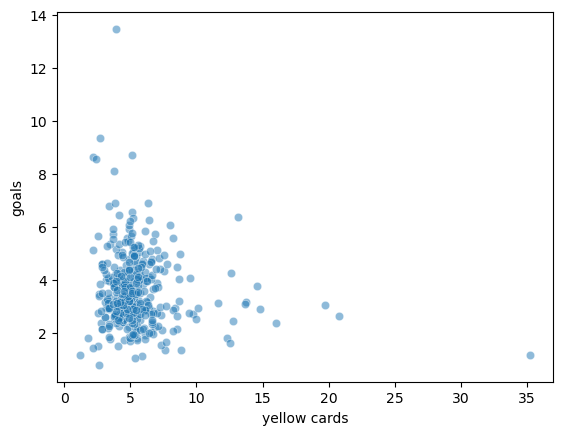

In [10]:
# Analyze the correlation between the number of yellow cards and goals conceded by a team.

final_temp = final[['team', 'yellow cards', 'goals']]
team_stats = final_temp.groupby('team').agg({
    "yellow cards": 'sum',
    "goals": 'sum'}).reset_index()
sns.scatterplot(data=team_stats, x='yellow cards', y='goals', alpha=.5)

In [11]:
# Identify players who have a current value higher than their highest value and vice versa.


final_temp = final[['name','highest_value', 'current_value']].copy()
final_temp['hv>cv'] = final_temp['highest_value'] > final_temp['current_value']
final_temp[final_temp['hv>cv']==True]

,name,highest_value,current_value,hv>cv
0,David de Gea,70000000,15000000,True
1,Jack Butland,22000000,1500000,True
2,Tom Heaton,6000000,600000,True
4,Raphaël Varane,80000000,40000000,True
5,Harry Maguire,70000000,25000000,True
...,...,...,...,...
10742,Milos Ninkovic,5500000,250000,True
10744,Alessandro Lopane,150000,125000,True
10745,Brandon Borrello,1200000,700000,True
10746,Amor Layouni,1000000,500000,True


In [12]:
#Create a metric that combines appearances, goals, and assists to evaluate a player's overall offensive contribution.

final_temp = final[['name', 'appearance', 'goals', 'assists']].copy()
final_temp['offensive_contribution'] = final_temp['appearance'] * 1.5 \
                                    + final_temp['goals'] * 2 \
                                    + final_temp['assists'] * 1.25
final_temp

,name,appearance,goals,assists,offensive_contribution
0,David de Gea,104,0.000000,0.000000,156.000000
1,Jack Butland,15,0.000000,0.000000,22.500000
2,Tom Heaton,4,0.000000,0.000000,6.000000
3,Lisandro Martínez,82,0.028090,0.056180,123.126404
4,Raphaël Varane,63,0.017889,0.017889,94.558140
...,...,...,...,...,...
10749,Aidan Simmons,16,0.175953,0.087977,24.461877
10750,Kusini Yengi,26,0.372671,0.186335,39.978261
10751,Nathanael Blair,20,0.375000,0.000000,30.750000
10752,Zachary Sapsford,17,0.312139,0.104046,26.254335


In [13]:
final.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger', 'goals+assists'],
      dtype='object')

In [14]:
#Investigate the relationship between the number of games injured and clean sheets for goalkeepers.

final_temp = final[['position', 'games_injured', 'clean sheets']]
final_temp['position'].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

<Axes: xlabel='games_injured', ylabel='clean sheets'>

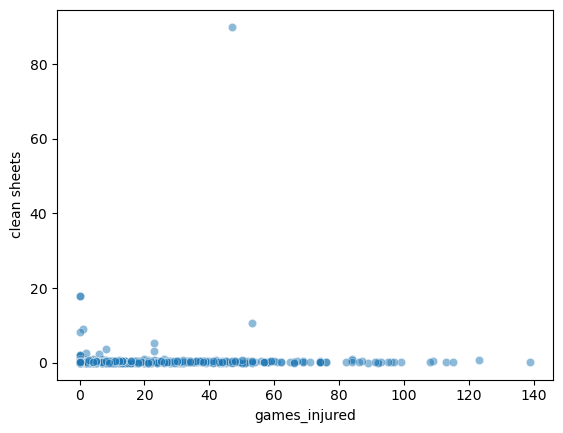

In [15]:
final_temp = final_temp[final_temp['position']=='Goalkeeper']
sns.scatterplot(data=final_temp, x='games_injured', y='clean sheets', alpha=.5)


from the graph,there is no much correlation between clean sheeets and games injured

<Axes: xlabel='award_won?', ylabel='days_injured'>

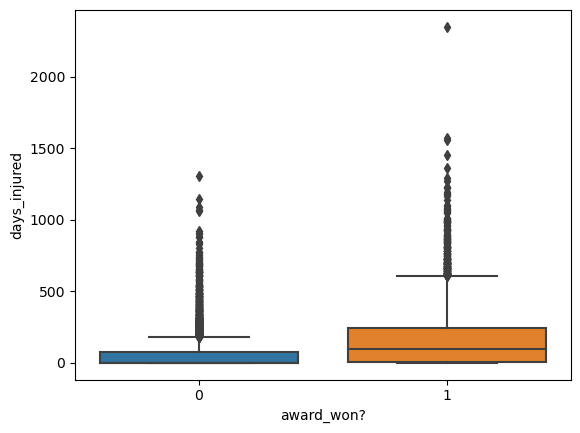

In [16]:
# .Explore the distribution of days_injured for players who have won an award and those who haven't.

final_temp = final[['days_injured', 'award']].copy()
final_temp['award_won?'] = final_temp['award'].apply(lambda x: 1 if x else 0)
sns.boxplot(data=final_temp, x='award_won?', y='days_injured')


rom the graph, we can say that there is a high distribution of award winning players who are prone to injuries 

In [17]:
final['team'].value_counts()

Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: team, Length: 374, dtype: int64

In [21]:
final.isnull()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,goals+assists
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10750,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10751,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10752,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


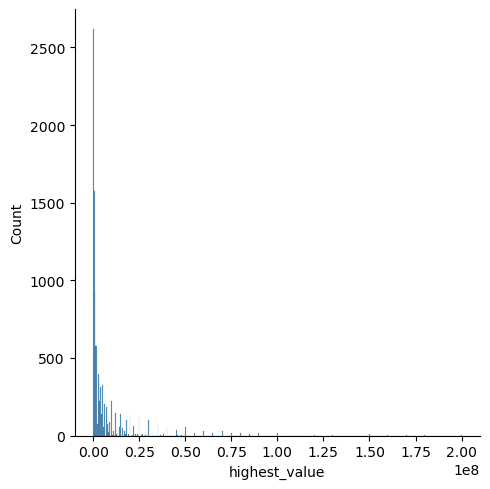

In [23]:
sns.displot(final['highest_value'])